#TensorFlow 2.0 Introduction
In this notebook you will be given an interactive introduction to TensorFlow 2.0. We will walk through the following topics within the TensorFlow module:

- TensorFlow Install and Setup
- Representing Tensors
- Tensor Shape and Rank
- Types of Tensors


If you'd like to follow along without installing TensorFlow on your machine you can use **Google Collaboratory**. Collaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

##Installing TensorFlow
To install TensorFlow on your local machine you can use pip.
```console
pip install tensorflow
```

![alt text](https://)If you have a CUDA enabled GPU you can install the GPU version of TensorFlow. You will also need to install some other software which can be found here: https://www.tensorflow.org/install/gpu
```console
pip install tensorflow-gpu
```

## Importing TensorFlow
The first step here is going to be to select the correct version of TensorFlow from within collabratory!


In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf  # now import the tensorflow module
print(tf.__version__)  # make sure the version is 2.x

2.18.0


##Tensors
"A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes." (https://www.tensorflow.org/guide/tensor)

It should't surprise you that tensors are a fundemental apsect of TensorFlow. They are the main objects that are passed around and manipluated throughout the program. Each tensor represents a partialy defined computation that will eventually produce a value. TensorFlow programs work by building a graph of Tensor objects that details how tensors are related. Running different parts of the graph allow results to be generated.

Each tensor has a data type and a shape.

**Data Types Include**: float32, int32, string and others.

**Shape**: Represents the dimension of data.

Just like vectors and matrices tensors can have operations applied to them like addition, subtraction, dot product, cross product etc.

In the next sections we will discuss some different properties of tensors. This is to make you more familiar with how tensorflow represnts data and how you can manipulate this data.


###Creating Tensors
Below is an example of how to create some different tensors.

You simply define the value of the tensor and the datatype and you are good to go! It's worth mentioning that usually we deal with tensors of numeric data, it is quite rare to see string tensors.

For a full list of datatypes please refer to the following guide.

https://www.tensorflow.org/api_docs/python/tf/dtypes/DType?version=stable

In [ ]:
string = tf.Variable("this is a string", tf.string)
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)

Difference between tf.Tensor and tf.*Variable*





In [ ]:

# Creating a Tensor (Immutable)
tensor = tf.constant(5.0)
#tensor.assign(10.0)  # ❌ This will raise an error
# Creating a Variable (Mutable)
variable = tf.Variable(5.0)
variable.assign(10.0)  # ✅ Allowed
print(variable.numpy())

10.0


Tf.Variable as Tensors.

In [ ]:
a = tf.Variable(3.0)
b = tf.constant(2.0)
c = a * b  # Works like a tensor operation
print(c.numpy())  # Output: 6.0

6.0


###Rank/Degree of Tensors
Another word for rank is degree, these terms simply mean the number of dimensions involved in the tensor. What we created above is a *tensor of rank 0*, also known as a scalar.

Now we'll create some tensors of higher degrees/ranks.

In [ ]:
rank1_tensor = tf.Variable( ["Test"], tf.string )
rank2_tensor = tf.Variable( [["test", "ok"], ["test", "yes"]], tf.string )

In [ ]:
print(rank1_tensor.shape)
print(rank2_tensor.shape)

(1,)
(2, 2)


**To determine the rank** of a tensor we can call the following method.

In [ ]:
# If a model throws shape mismatch errors, tf.rank can help identify incorrect tensor shapes.
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

The rank of a tensor is direclty related to the deepest level of nested lists. You can see in the first example ```["Test"]``` is a rank 1 tensor as the deepest level of nesting is 1.
Where in the second example ```[["test", "ok"], ["test", "yes"]]``` is a rank 2 tensor as the deepest level of nesting is 2.

###Shape of Tensors
Now that we've talked about the rank of tensors it's time to talk about the shape. The shape of a tensor is simply the number of elements that exist in each dimension. TensorFlow will try to determine the shape of a tensor but sometimes it may be unknown.

To **get the shape** of a tensor we use the shape attribute.


In [ ]:
rank2_tensor.shape

TensorShape([2, 2])

###Changing Shape
The number of elements of a tensor is the product of the sizes of all its shapes. There are often many shapes that have the same number of elements, making it convient to be able to change the shape of a tensor.

The example below shows how to change the shape of a tensor.

In [ ]:
tensor0 = tf.zeros([5])
tensor1 = tf.ones([1,2,3])  # tf.ones() creates a shape [1,2,3] tensor full of ones
tensor2 = tf.reshape(tensor1, [2,3,1])  # reshape existing data to shape [2,3,1]
tensor3 = tf.reshape(tensor2, [3, -1])  # -1 tells the tensor to calculate the size of the dimension in that place
                                        # this will reshape the tensor to [3,3]

# The numer of elements in the reshaped tensor MUST match the number in the original

Now let's have a look at our different tensors.

In [ ]:
print(tensor0)
print(tensor1)
print(tensor2)
print(tensor3)
# Notice the changes in shape

tf.Tensor([0. 0. 0. 0. 0.], shape=(5,), dtype=float32)
tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


###Slicing Tensors
You may be familiar with the term "slice" in python and its use on lists, tuples etc. Well the slice operator can be used on tensors to select specific axes or elements.

When we slice or select elements from a tensor, we can use comma seperated values inside the set of square brackets. Each subsequent value refrences a different dimension of the tensor.

Ex: ```tensor[dim1, dim2, dim3]```

I've included a few examples that will hopefully help illustrate how we can manipulate tensors with the slice operator.

In [ ]:
# Creating a 2D tensor
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tensor = tf.Variable(matrix, dtype=tf.int32)
print(tf.rank(tensor))
print(tensor.shape)

tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


In [ ]:
# Now lets select some different rows and columns from our tensor

three = tensor[0,2]  # selects the 3rd element from the 1st row
print(three)  # -> 3
row1 = tensor[0]  # selects the first row
print(row1)
column1 = tensor[:, 0]  # selects the first column
print(column1)
row_2_and_4 = tensor[1::2]  # selects second and fourth row
print(row_2_and_4)
column_1_in_row_2_and_3 = tensor[1:3, 0]
print(column_1_in_row_2_and_3)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)
tf.Tensor(
[[ 6  7  8  9 10]
 [16 17 18 19 20]], shape=(2, 5), dtype=int32)
tf.Tensor([ 6 11], shape=(2,), dtype=int32)


#Introduction to Neural Networks
In this notebook you will learn how to create and use a neural network to classify articles of clothing. To achieve this, we will use a sub module of TensorFlow called *keras*.

*This guide is based on the following TensorFlow documentation.*

https://www.tensorflow.org/tutorials/keras/classification

##Keras
Before we dive in and start discussing neural networks, I'd like to give a breif introduction to keras.

From the keras official documentation (https://keras.io/) keras is described as follows.

"Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation.

Use Keras if you need a deep learning library that:

- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU."

Keras is a very powerful module that allows us to avoid having to build neural networks from scratch. It also hides a lot of mathematical complexity (that otherwise we would have to implement) inside of helpful packages, modules and methods.

In this guide we will use keras to quickly develop neural networks.



##What is a Neural Network
So, what are these magical things that have been beating chess grandmasters, driving cars, detecting cancer cells and winning video games?

A deep neural network is a layered representation of data. The term "deep" refers to the presence of multiple layers. Recall that in our core learning algorithms (like linear regression) data was not transformed or modified within the model, it simply existed in one layer. We passed some features to our model, some math was done, an answer was returned. The data was not changed or transformed throughout this process. A neural network processes our data differently. It attempts to represent our data in different ways and in different dimensions by applying specific operations to transform our data at each layer. Another way to express this is that at each layer our data is transformed in order to learn more about it. By performing these transformations, the model can better understand our data and therefore provide a better prediction.



##How it Works
Before going into too much detail I will provide a very surface level explination of how neural networks work on a mathematical level. All the terms and concepts I discuss will be defined and explained in more detail below.

On a lower level neural networks are simply a combination of elementry math operations and some more advanced linear algebra. Each neural network consists of a sequence of layers in which data passes through. These layers are made up on neurons and the neurons of one layer are connected to the next (see below). These connections are defined by what we call a weight (some numeric value). Each layer also has something called a bias, this is simply an extra neuron that has no connections and holds a single numeric value. Data starts at the input layer and is trasnformed as it passes through subsequent layers. The data at each subsequent neuron is defined as the following.

> $Y =(\sum_{i=0}^n w_i x_i) + b$

> $w$ stands for the weight of each connection to the neuron

> $x$ stands for the value of the connected neuron from the previous value

> $b$ stands for the bias at each layer, this is a constant

> $n$ is the number of connections

> $Y$ is the output of the current neuron

> $\sum$ stands for sum

The equation you just read is called a weighed sum. We will take this weighted sum at each and every neuron as we pass information through the network. Then we will add what's called a bias to this sum. The bias allows us to shift the network up or down by a constant value. It is like the y-intercept of a line.

But that equation is the not complete one! We forgot a crucial part, **the activation function**. This is a function that we apply to the equation seen above to add complexity and dimensionality to our network. Our new equation with the addition of an activation function $F(x)$ is seen below.

> $Y =F((\sum_{i=0}^n w_i x_i) + b)$

Our network will start with predefined activation functions (they may be different at each layer) but random weights and biases. As we train the network by feeding it data it will learn the correct weights and biases and adjust the network accordingly using a technqiue called **backpropagation** (explained below). Once the correct weights and biases have been learned our network will hopefully be able to give us meaningful predictions. We get these predictions by observing the values at our final layer, the output layer.




##Breaking Down The Neural Network!

Before we dive into any code lets break down how a neural network works and what it does.

![alt text](http://www.extremetech.com/wp-content/uploads/2015/07/NeuralNetwork.png)
*Figure 1*




###Data
The type of data a neural network processes varies drastically based on the problem being solved. When we build a neural network, we define what shape and kind of data it can accept. It may sometimes be neccessary to modify our dataset so that it can be passed to our neural network.

Some common types of data a neural network uses are listed below.
- Vector Data (2D)
- Timeseries or Sequence (3D)
- Image Data (4D)
- Video Data (5D)

There are of course many different types or data, but these are the main categories.



###Layers
As we mentioned earlier each neural network consists of multiple layers. At each layer a different transformation of data occurs. Our initial input data is fed through the layers and eventually arrives at the output layer where we will obtain the result.
####Input Layer
The input layer is the layer that our initial data is passed to. It is the first layer in our neural network.
####Output Layer
The output layer is the layer that we will retrive our results from. Once the data has passed through all other layers it will arrive here.
####Hidden Layer(s)
All the other layers in our neural network are called "hidden layers". This is because they are hidden to us, we cannot observe them. Most neural networks consist of at least one hidden layer but can have an unlimited amount. Typically, the more complex the model the more hidden layers.
####Neurons
Each layer is made up of what are called neurons. Neurons have a few different properties that we will discuss later. The important aspect to understand now is that each neuron is responsible for generating/holding/passing ONE numeric value.

This means that in the case of our input layer it will have as many neurons as we have input information. For example, say we want to pass an image that is 28x28 pixels, thats 784 pixels. We would need 784 neurons in our input layer to capture each of these pixels.

This also means that our output layer will have as many neurons as we have output information. The output is a little more complicated to understand so I'll refrain from an example right now but hopefully you're getting the idea.

But what about our hidden layers? Well these have as many neurons as we decide. We'll discuss how we can pick these values later but understand a hidden layer can have any number of neurons.
####Connected Layers
So how are all these layers connected? Well the neurons in one layer will be connected to neurons in the subsequent layer. However, the neurons can be connected in a variety of different ways.

Take for example *Figure 1* (look above). Each neuron in one layer is connected to every neuron in the next layer. This is called a **dense** layer. There are many other ways of connecting layers but well discuss those as we see them.



###Weights
Weights are associated with each connection in our neural network. Every pair of connected nodes will have one weight that denotes the strength of the connection between them. These are vital to the inner workings of a neural network and will be tweaked as the neural network is trained. The model will try to determine what these weights should be to achieve the best result. Weights start out at a constant or random value and will change as the network sees training data.

###Biases
Biases are another important part of neural networks and will also be tweaked as the model is trained. A bias is simply a constant value associated with each layer. It can be thought of as an extra neuron that has no connections. The purpose of a bias is to shift an entire activation function by a constant value. This allows a lot more flexibllity when it comes to choosing an activation and training the network. There is one bias for each layer.

###Activation Function
Activation functions are simply a function that is applied to the weighed sum of a neuron. They can be anything we want but are typically higher order/degree functions that aim to add a higher dimension to our data. We would want to do this to introduce more comolexity to our model. By transforming our data to a higher dimension, we can typically make better, more complex predictions.

A list of some common activation functions and their graphs can be seen below.

- Relu (Rectified Linear Unit)

![alt text](https://yashuseth.files.wordpress.com/2018/02/relu-function.png?w=309&h=274)
- Tanh (Hyperbolic Tangent)

![alt text](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)
- Sigmoid

![alt text](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)



###Backpropagation
Backpropagation is the fundemental algorithm behind training neural networks. It is what changes the weights and biases of our network. To fully explain this process, we need to start by discussing something called a cost/loss function.

####Loss/Cost Function
As we now know our neural network feeds information through the layers until it eventually reaches an output layer. This layer contains the results that we look at to determine the prediciton from our network. In the training phase it is likely that our network will make many mistakes and poor predicitions. In fact, at the start of training our network doesn't know anything (it has random weights and biases)!

We need some way of evaluating if the network is doing well and how well it is doing. For our training data we have the features (input) and the labels (expected output), because of this we can compare the output from our network to the expected output. Based on the difference between these values we can determine if our network has done a good job or poor job. If the network has done a good job, we'll make minor changes to the weights and biases. If it has done a poor job our changes may be more drastic.

So, this is where the cost/loss function comes in. This function is responsible for determining how well the network did. We pass it the output and the expected output, and it returns to us some value representing the cost/loss of the network. This effectively makes the networks job to optimize this cost function, trying to make it as low as possible.

Some common loss/cost functions include.
- Mean Squared Error
- Mean Absolute Error
- Hinge Loss

####Gradient Descent
Gradient descent and backpropagation are closely related. Gradient descent is the algorithm used to find the optimal paramaters (weights and biases) for our network, while backpropagation is the process of calculating the gradient that is used in the gradient descent step.

Gradient descent requires some pretty advanced calculus and linear algebra to understand so we'll stay away from that for now. Let's just read the formal definition for now.

"Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model." (https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

And that's all we really need to know for now. I'll direct you to the video for a more in depth explination.

![alt text](https://cdn-images-1.medium.com/max/1000/1*iU1QCnSTKrDjIPjSAENLuQ.png)



###Optimizer
You may sometimes see the term optimizer or optimization function. This is simply the function that implements the backpropagation algorithm described above. Here's a list of a few common ones.
- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerated Gradient

*This article explains them quite well is where I've pulled this list from.*

(https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

##Creating a Neural Network
Okay now you have reached the exciting part of this tutorial! No more math and complex explinations. Time to get hands on and train a very basic neural network.

*As stated earlier this guide is based off of the following TensorFlow tutorial.*
https://www.tensorflow.org/tutorials/keras/classification


###Imports

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


###Dataset
For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Let's have a look at this data to see what we are working with.




In [ ]:
train_images.shape

(60000, 28, 28)

So we've got 60,000 images that are made up of 28x28 pixels (784 in total).

In [ ]:
train_images[0,23,23]  # let's have a look at one pixel

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [ ]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Fianlly let's look at what some of these images look like!

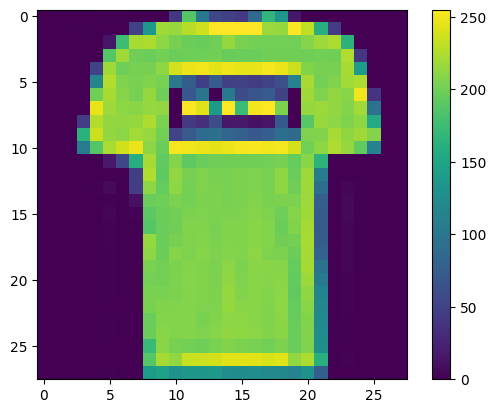

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

##Data Preprocessing
The last step before creating our model is to *preprocess* our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.



In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

##Building the Model
Now it's time to build the model! We are going to use a keras *sequential* model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

###Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Training the Model
Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [ ]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7812 - loss: 0.6331
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8600 - loss: 0.3866
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8775 - loss: 0.3346
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8841 - loss: 0.3150
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8913 - loss: 0.2957
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8986 - loss: 0.2761
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9015 - loss: 0.2643
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9068 - loss: 0.2522
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9069 - loss: 0.2449
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9158 - loss: 0.2271


##Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The *verbose* argument is defined from the keras documentation as:
"verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."
(https://keras.io/models/sequential/)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8757 - loss: 0.3523
Test accuracy: 0.8737000226974487


You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as **overfitting**.

And now we have a trained model that's ready to use to predict some values!

##Making Predictions
To make predictions we simply need to pass an array of data in the form we've specified in the input layer to ```.predict()``` method.

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
predictions

array([[5.4976050e-09, 1.3917956e-12, 5.8071848e-08, ..., 2.0412288e-03,
        2.6799578e-09, 9.8228884e-01],
       [4.6612808e-05, 2.7446659e-13, 9.8005193e-01, ..., 1.2781725e-19,
        2.2247501e-10, 7.7286979e-15],
       [4.4362399e-11, 9.9999994e-01, 4.8132308e-16, ..., 3.4320561e-27,
        3.1154554e-15, 5.9534847e-24],
       ...,
       [3.5526671e-03, 6.2208692e-09, 1.2607413e-04, ..., 7.1735453e-09,
        9.9517363e-01, 1.8125623e-10],
       [1.5334402e-09, 9.9999183e-01, 8.9711008e-13, ..., 6.4269445e-16,
        1.0870734e-09, 1.0886282e-15],
       [4.4461776e-06, 1.1125788e-09, 8.6029452e-08, ..., 9.8157930e-04,
        1.0685104e-04, 5.0351723e-06]], dtype=float32)

If we wan't to get the value with the highest score we can use a useful function from numpy called ```argmax()```. This simply returns the index of the maximium value from a numpy array.

In [ ]:
np.argmax(predictions[0])

9

And we can check if this is correct by looking at the value of the cooresponding test label.

In [ ]:
test_labels[0]

9

##Verifying Predictions
I've written a small function here to help us verify predictions with some simple visuals.

Pick a number: 156
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


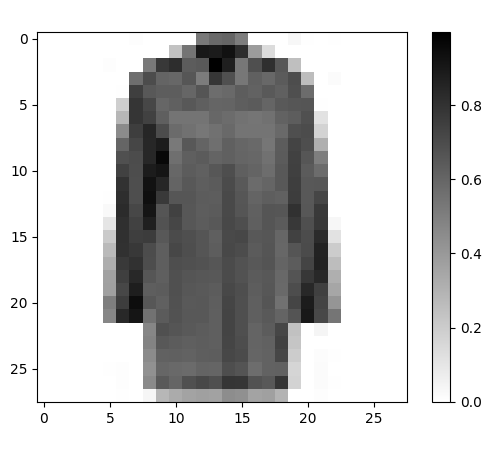

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

#Sources
Most of the information is taken direclty from the TensorFlow website which can be found below.

https://www.tensorflow.org/guide/tensor

#Deep Computer Vision

In this guide we will learn how to peform *image classification and object detection/recognition* using deep computer vision with something called a **convolutional neural network**.

The goal of our convolutional neural networks will be to classify and detect images or specific objects from within the image. We will be using image data as our features and a label for those images as our label or output.

We already know how neural networks work so we can skip through the basics and move right into explaining the following concepts.
- Image Data
- Convolutional Layer
- Pooling Layer
- CNN Architectures

The major differences we are about to see in these types of neural networks are the layers that make them up.

##Image Data
So far, we have dealt with pretty straight forward data that has 1 or 2 dimensions. Now we are about to deal with image data that is usually made up of 3 dimensions. These 3 dimensions are as follows:
- image height
- image width
- color channels

The only item in the list above you may not understand is **color channels**. The number of color channels represents the depth of an image and coorelates to the colors used in it. For example, an image with three channels is likely made up of rgb (red, green, blue) pixels. So, for each pixel we have three numeric values in the range 0-255 that define its color. For an image of color depth 1 we would likely have a greyscale image with one value defining each pixel, again in the range of 0-255.

![alt text](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png)

Keep this in mind as we discuss how our network works and the input/output of each layer.



##Convolutional Neural Network
**Note:** I will use the term *convnet* and convolutional neural network interchangably.

Each convolutional neural network is made up of one or many convolutional layers. These layers are different than the *dense* layers we have seen previously. Their goal is to find patterns from within images that can be used to classify the image or parts of it. But this may sound familiar to what our densly connected neural network in the previous section was doing, well that's becasue it is.

The fundemental difference between a dense layer and a convolutional layer is that dense layers detect patterns globally while convolutional layers detect patterns locally. When we have a densly connected layer each node in that layer sees all the data from the previous layer. This means that this layer is looking at all the information and is only capable of analyzing the data in a global capacity. Our convolutional layer however will not be densly connected, this means it can detect local patterns using part of the input data to that layer.

*Let's have a look at how a densly connected layer would look at an image vs how a convolutional layer would.*

This is our image; the goal of our network will be to determine whether this image is a cat or not.
![alt text](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/reference_guide/cat_weight_ref_guide/1800x1200_cat_weight_ref_guide.jpg)

**Dense Layer:** A dense layer will consider the ENTIRE image. It will look at all the pixels and use that information to generate some output.

**Convolutional Layer:** The convolutional layer will look at specific parts of the image. In this example let's say it analyzes the highlighted parts below and detects patterns there.
![alt text](https://drive.google.com/uc?export=view&id=1M7v7S-b-zisFLI_G4ZY_RdUJQrGpJ3zt)

Can you see why this might make these networks more useful?




###How They Work
A dense neural network learns patterns that are present in one specific area of an image. This means if a pattern that the network knows is present in a different area of the image it will have to learn the pattern again in that new area to be able to detect it.

*Let's use an example to better illustrate this.*

We'll consider that we have a dense neural network that has learned what an eye looks like from a sample of dog images.

![alt text](https://drive.google.com/uc?export=view&id=16FJKkVS_lZToQOCOOy6ohUpspWgtoQ-c)

Let's say it's determined that an image is likely to be a dog if an eye is present in the boxed off locations of the image above.

Now let's flip the image.
![alt text](https://drive.google.com/uc?export=view&id=1V7Dh7BiaOvMq5Pm_jzpQfJTZcpPNmN0W)

Since our densly connected network has only recognized patterns globally it will look where it thinks the eyes should be present. Clearly it does not find them there and therefore would likely determine this image is not a dog. Even though the pattern of the eyes is present, it's just in a different location.

Since convolutional layers learn and detect patterns from different areas of the image, they don't have problems with the example we just illustrated. They know what an eye looks like and by analyzing different parts of the image can find where it is present.



###Multiple Convolutional Layers
In our models it is quite common to have more than one convolutional layer. Even the basic example we will use in this guide will be made up of 3 convolutional layers. These layers work together by increasing complexity and abstraction at each subsequent layer. The first layer might be responsible for picking up edges and short lines, while the second layer will take as input these lines and start forming shapes or polygons. Finally, the last layer might take these shapes and determine which combiantions make up a specific image.





##Feature Maps
You may see me use the term *feature map* throughout this tutorial. This term simply stands for a 3D tensor with two spacial axes (width and height) and one depth axis. Our convolutional layers take feature maps as their input and return a new feature map that reprsents the prescence of spcific filters from the previous feature map. These are what we call *response maps*.

##Layer Parameters
A convolutional layer is defined by two key parameters.

####**Filters**
A filter is a m x n pattern of pixels that we are looking for in an image. The number of filters in a convolutional layer reprsents how many patterns each layer is looking for and what the depth of our response map will be. If we are looking for 32 different patterns/filters than our output feature map (aka the response map) will have a depth of 32. Each one of the 32 layers of depth will be a matrix of some size containing values indicating if the filter was present at that location or not.

Here's a great illustration from the book "Deep Learning with Python" by Francois Chollet (pg 124).
![alt text](https://drive.google.com/uc?export=view&id=1HcLvvLKvLCCGuGZPMvKYz437FbbCC2eB)

####**Sample Size**
This isn't really the best term to describe this, but each convolutional layer is going to examine n x m blocks of pixels in each image. Typically, we'll consider 3x3 or 5x5 blocks. In the example above we use a 3x3 "sample size". This size will be the same as the size of our filter.

Our layers work by sliding these filters of n x m pixels over every possible position in our image and populating a new feature map/response map indicating whether the filter is present at each location.




##Borders and Padding
The more mathematical of you may have realized that if we slide a filter of let's say size 3x3 over our image well consider less positions for our filter than pixels in our input. Look at the example below.

*Image from "Deep Learning with Python" by Francois Chollet (pg 126).*
![alt text](https://drive.google.com/uc?export=view&id=1OEfXrV16NBjwAafgBfYYcWOyBCHqaZ5M)

This means our response map will have a slightly smaller width and height than our original image. This is fine but sometimes we want our response map to have the same dimensions. We can accomplish this by using something called *padding*.

**Padding** is simply the addition of the appropriate number of rows and/or columns to your input data such that each pixel can be centered by the filter.

##Strides
In the previous sections we assumed that the filters would be slid continously through the image such that it covered every possible position. This is common but sometimes we introduce the idea of a **stride** to our convolutional layer. The stride size reprsents how many rows/cols we will move the filter each time. These are not used very frequently so we'll move on.

##Pooling
You may recall that our convnets are made up of a stack of convolution and pooling layers.

The idea behind a pooling layer is to downsample our feature maps and reduce their dimensions. They work in a similar way to convolutional layers where they extract windows from the feature map and return a response map of the max, min or average values of each channel. Pooling is usually done using windows of size 2x2 and a stride of 2. This will reduce the size of the feature map by a factor of two and return a response map that is 2x smaller.

##A More Detailed Look
Please refer to the video to learn how all of this happens at the lower level!

##Creating a Convnet

Now it is time to create our first convnet! This example is for the purpose of getting familiar with CNN architectures, we will talk about how to improves its performance later.

*This tutorial is based on the following guide from the TensorFlow documentation: https://www.tensorflow.org/tutorials/images/cnn*

###Dataset
The problem we will consider here is classifying 10 different everyday objects. The dataset we will use is built into tensorflow and called the [**CIFAR Image Dataset.**](https://www.cs.toronto.edu/~kriz/cifar.html) It contains 60,000 32x32 color images with 6000 images of each class.

The labels in this dataset are the following:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

We'll load the dataset and have a look at some of the images below.




In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = [ 'airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


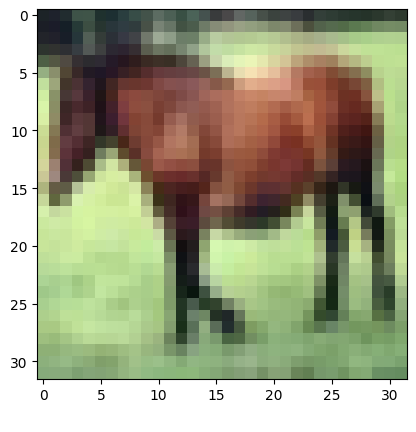

In [ ]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

##CNN Architecture
A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the **Convolutional Base**.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Layer 1**

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

**Layer 2**

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

**Other Layers**

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [ ]:
model.summary()  # let's have a look at our model so far

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

After looking at the summary you should notice that the depth of our image increases but the spacial dimensions reduce drastically.

##Adding Dense Layers
So far, we have just completed the **convolutional base**. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.



In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

We can see that the flatten layer changes the shape of our data so that we can feed it to the 64-node dense layer, follwed by the final output layer of 10 neurons (one for each class).



##Training
Now we will train and compile the model using the recommended hyper paramaters from tensorflow.

*Note: This will take much longer than previous models!*

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4,
                    validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.3538 - loss: 1.7510 - val_accuracy: 0.5317 - val_loss: 1.3099
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.5716 - loss: 1.2071 - val_accuracy: 0.6177 - val_loss: 1.0823
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6431 - loss: 1.0282 - val_accuracy: 0.6675 - val_loss: 0.9669
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6765 - loss: 0.9238 - val_accuracy: 0.6669 - val_loss: 0.9490


##Evaluating the Model
We can determine how well the model performed by looking at it's performance on the test data set.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 2s - 8ms/step - accuracy: 0.6669 - loss: 0.9490
0.6668999791145325


You should be getting an accuracy of about 70%. This isn't bad for a simple model like this, but we'll dive into some better approaches for computer vision below.



##Working with Small Datasets
In the situation where you don't have millions of images it is difficult to train a CNN from scratch that performs very well. This is why we will learn about a few techniques we can use to train CNN's on small datasets of just a few thousand images.

###Data Augmentation
To avoid overfitting and create a larger dataset from a smaller one we can use a technique called data augmentation. This is simply performing random transofrmations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes.

Fortunately, keras can help us do this. Look at the code below to an example of data augmentation.



In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()


###Pretrained Models
You would have noticed that the model above takes a few minutes to train in the NoteBook and only gives an accuaracy of ~70%. This is okay but surely there is a way to improve on this.

In this section we will talk about using a pretrained CNN as apart of our own custom network to improve the accuracy of our model. We know that CNN's alone (with no dense layers) don't do anything other than map the presence of features from our input. This means we can use a pretrained CNN, one trained on millions of images, as the start of our model. This will allow us to have a very good convolutional base before adding our own dense layered classifier at the end. In fact, by using this techique we can train a very good classifier for a realtively small dataset (< 10,000 images). This is because the convnet already has a very good idea of what features to look for in an image and can find them very effectively. So, if we can determine the presence of features all the rest of the model needs to do is determine which combination of features makes a specific image.



###Fine Tuning
When we employ the technique defined above, we will often want to tweak the final layers in our convolutional base to work better for our specific problem. This involves not touching or retraining the earlier layers in our convolutional base but only adjusting the final few. We do this because the first layers in our base are very good at extracting low level features lile lines and edges, things that are similar for any kind of image. Where the later layers are better at picking up very specific features like shapes or even eyes. If we adjust the final layers than we can look for only features relevant to our very specific problem.



##Using a Pretrained Model
In this section we will combine the tecniques we learned above and use a pretrained model and fine tuning to classify images of dogs and cats using a small dataset.

*This tutorial is based on the following guide from the TensorFlow documentation: https://www.tensorflow.org/tutorials/images/transfer_learning*




In [ ]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

###Dataset
We will load the *cats_vs_dogs* dataset from the modoule tensorflow_datatsets.

This dataset contains (image, label) pairs where images have different dimensions and 3 color channels.



In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [ ]:
get_label_name = metadata.features['label'].int2str  # creates a function object that we can use to get labels
# display 2 images from the dataset
for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

###Data Preprocessing
Since the sizes of our images are all different, we need to convert them all to the same size. We can create a function that will do that for us below.



In [ ]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

Now we can apply this function to all our images using ```.map()```.

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

Let's have a look at our images now.

In [ ]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

Finally we will shuffle and batch the images.

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

Now if we look at the shape of an original image vs the new image we will see it has been changed.

In [ ]:
for img, label in raw_train.take(2):
  print("Original shape:", img.shape)

for img, label in train.take(2):
  print("New shape:", img.shape)

###Picking a Pretrained Model
The model we are going to use as the convolutional base for our model is the **MobileNet V2** developed at Google. This model is trained on 1.4 million images and has 1000 different classes.

We want to use this model but only its convolutional base. So, when we load in the model, we'll specify that we don't want to load the top (classification) layer. We'll tell the model what input shape to expect and to use the predetermined weights from *imagenet* (Googles dataset).



In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top= False,
                                               weights='imagenet')

In [ ]:
base_model.summary()

At this point this *base_model* will simply output a shape (32, 5, 5, 1280) tensor that is a feature extraction from our original (1, 160, 160, 3) image. The 32 means that we have 32 layers of differnt filters/features.

In [ ]:
for image, _ in train_batches.take(1):
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

###Freezing the Base
The term **freezing** refers to disabling the training property of a layer. It simply means we won’t make any changes to the weights of any layers that are frozen during training. This is important as we don't want to change the convolutional base that already has learned weights.



In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

###Adding our Classifier
Now that we have our base layer setup, we can add the classifier. Instead of flattening the feature map of the base layer we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature map and return to us a single 1280 element vector per filter.  



In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

Finally, we will add the predicition layer that will be a single dense neuron. We can do this because we only have two classes to predict for.




In [ ]:
prediction_layer = keras.layers.Dense(1)

Now we will combine these layers together in a model.

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
model.summary()

###Training the Model
Now we will train and compile the model. We will use a very small learning rate to ensure that the model does not have any major changes made to it.

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# We can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 3
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

In [ ]:
# Now we can train it on our images
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)

In [ ]:
model.save("dogs_vs_cats.h5")  # we can save the model and reload it at anytime in the future
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

In [ ]:
### Applying GradientTape for customized loss function.
# Define model and loss
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
loss_fn = tf.keras.losses.MeanSquaredError()

# Use Adam optimizer (which has an adaptive learning rate)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Training step
with tf.GradientTape() as tape:
    predictions = model(tf.constant([[1.0], [2.0], [3.0]]))
    loss = loss_fn(tf.constant([[2.0], [4.0], [6.0]]), predictions)
# Compute and apply gradients
grads = tape.gradient(loss, model.trainable_variables)
optimizer.apply_gradients(zip(grads, model.trainable_variables))

#Using GPU for training

In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available: 1


In [ ]:
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model (TensorFlow will automatically use the GPU)
with tf.device('/GPU:0'):
  history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test))

print(acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8749 - loss: 0.4412 - val_accuracy: 0.9583 - val_loss: 0.1391
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9645 - loss: 0.1249 - val_accuracy: 0.9723 - val_loss: 0.0959
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9755 - loss: 0.0803 - val_accuracy: 0.9732 - val_loss: 0.0832
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9825 - loss: 0.0578 - val_accuracy: 0.9719 - val_loss: 0.0873
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9867 - loss: 0.0442 - val_accuracy: 0.9743 - val_loss: 0.0837
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9894 - loss: 0.0343 - val_accuracy: 0.9786 - val_loss: 0.0759
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0261 - val_accuracy: 0.9772 - val_loss: 0.0736
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9943 - loss: 0.0202 -

##Object Detection
If you'd like to learn how you can perform object detection and recognition with tensorflow check out the guide below.

https://github.com/tensorflow/models/tree/master/research/object_detection

##Sources
1. “Convolutional Neural Network (CNN) &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/images/cnn.
2. “Transfer Learning with a Pretrained ConvNet &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/images/transfer_learning.
3. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.

